# 1. Frame the problem and look at the big picture

California Housing Prices er et datasett med beregninger som bla. befolkning, medianinntekt og median-huspris for hvert distrikt i California. 

I denne notebooken skal vår modell lære fra dette datasettet, for så å kunne forutsi median-huspris i et distrikt gitt alle de andre beregningene. 

Vår modell sine output vil bli gitt til et annen maskinlæring-system, sammen med flere andre signaler. Dette systemet vil kunne si om det er verdt å investere i et gitt område eller ikke. Det er derfor svært viktig at vår modell gir korrekte output, da firmaets mål vil være å tjene penger på å bruke systemet for å bestemme verdien av investeringer. 

Foreløpig er løsningen på problemet å regne ut prisene manuelt, av eskperter. Dette er tidkrevende og gir en feilrate på rundt 20%. 

Dette er en supervised learning oppgave fordi vi blir gitt labeled trenings-eksempler (hver instans kommer med forventet output). Det er også en regresjons-oppgave fordi vi blir bedt om å forutsi en verdi.

Performance measure: Root Mean Square Error (RMSE) eller Mean absolute error (MAE). Den største forskjellen på disse to er sensitiviteten til ekstremverdien. RMSE fungerer godt når det er lite ekstremverdier, mens MAE yter bedre når det er mange. I dette prosjektet antar vi at frekvensen av ekstremverdier er liten og velger RMSE som performance measure. 

*Ekstremverdi: viser til en avvikende observert verdi som skiller seg vesentlig ut fra andre observerte verdier. 

Ligningen for RMSE:

X = Matrix containing all the feature values of all instances in the dataset.

m = The number of instances in the dataset you are measuring the RMSE on.

x^(i) = Is a vector of all the feature values (excluding the label) of the i'th instance in the dataset.

y^(i) = The label (desired output value) of x^(i).

h = The system's prediction function. Also called a hypothesis.

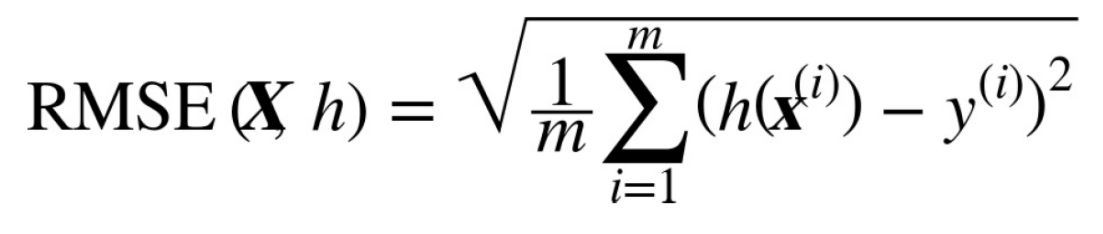

# 2. Get the data 

Setup. Installerer og implementerer biblioteker vi vil få bruk for. 

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Data ble lastet ned fra kaggle og lagt i en mappe "data" i mappen "dat158-ml-course21". 

In [2]:
import os
print(os.listdir("../data"))

['.ipynb_checkpoints', 'ML_group_24.ipynb', 'sample_submission.csv', 'submission.csv', 'test.csv', 'train.csv', 'Untitled.ipynb', 'Untitled1.ipynb']


Leser i cvs-filer og oppretter en dataframe ved bruk av pandas. 

In [3]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
sampleSubmission = pd.read_csv('../data/sample_submission.csv')

Tar en rask titt på datastrukturen.

Ser på de øverste fem radene i train og test ved bruk av Dataframe sin head(). 

In [4]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [5]:
test.head()

,Id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,NEAR BAY
1,1,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,<1H OCEAN
2,2,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,INLAND
3,3,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,<1H OCEAN
4,4,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,INLAND


Sjekker antall rader, attributt-typer og antall nonnull verdier ved bruk av info().

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  4128 non-null   int64  
 1   longitude           4128 non-null   float64
 2   latitude            4128 non-null   float64
 3   housing_median_age  4128 non-null   float64
 4   total_rooms         4128 non-null   float64
 5   total_bedrooms      4089 non-null   float64
 6   population          4128 non-null   float64
 7   households          4128 non-null   float64
 8   median_income       4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 322.6+ KB


Sammendrag av de numeriske attributtene ved bruk av describe().

In [8]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


Det er viktig å sette til side et test-sett av datasettet. I vår oppgave har vi allerede fått utdelt et datasett med train og et datasett med test. Derfor blir det ikke gjort mer med tanke på å splitte datasetett i test og train. 

# 3. Discover and Visualize the Data to Gain Insights

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

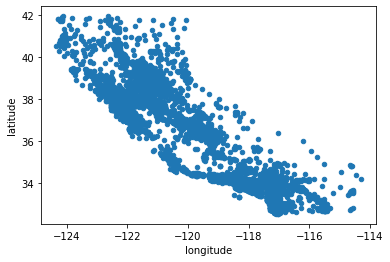

In [9]:
train.plot(kind="scatter", x="longitude", y="latitude")

Denne visualiseringen gjør det vanskelig å se noe mønster. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

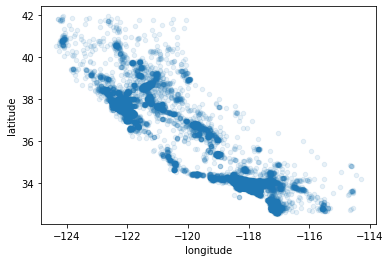

In [10]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Her settes alfa til 0.1 og vi kan se tydeligere hvilke områder som har høyere tetthet av datapunkter.

Vi ønsker å se en visualisering av både befolkning og pris. Bruker derfor et predefinert fargekart (jet). Radiusen til sirklene representerer distriktets befolkning. Fargen representerer prisen, hvor blå er lave verdier og rød er høye priser.

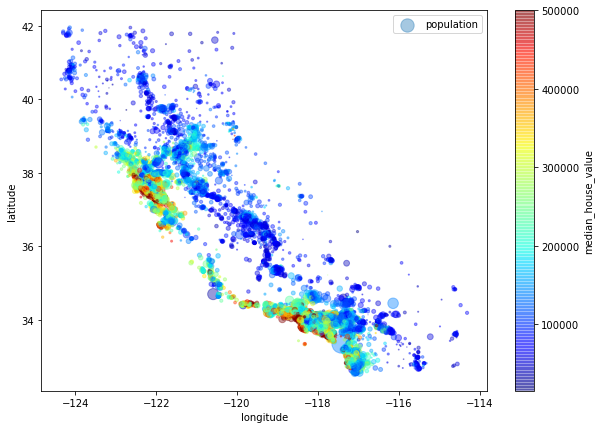

In [11]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=train["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()


En kan se etter sammenehenger mellom attributter ved å bruke scatter_matrix() funskjonen. Denne plotter hver numeriske attributt mot andre numeriske attributter. For å få plass på siden må vi velge noen attributter vi ønsker å sette opp mot hverandre. 

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

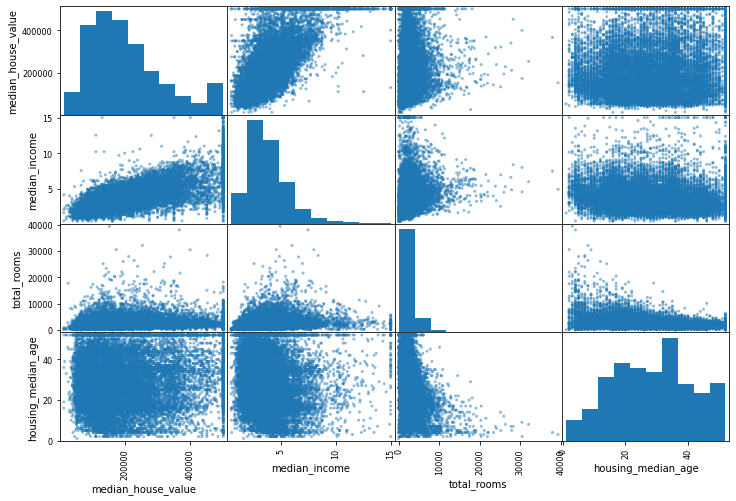

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(train[attributes], figsize=(12, 8))

Vi ønsker å zoome inn på sammenhengen mellom median_house_value og median_income. Denne sammenhengen ser vi er svært sterk ettersom økende medianinntekt også gir en økende median-husverdi.

(0.0, 16.0, 0.0, 550000.0)

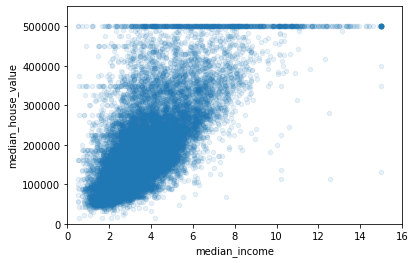

In [13]:
train.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

# Prepare the data for Machine Learning Algorithms

Lager et clean training sett.

In [14]:
housing = train.drop("median_house_value", axis=1)
housing_labels = train["median_house_value"].copy()

Data cleaning.

Total_bedrooms mangler noen verdier som må fikses. Velger her å fjerne hele attributten.

In [15]:
housing.drop("total_bedrooms", axis=1)       # option 2, get rid of the whole attribute

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
0,-122.13,37.67,40.0,1748.0,914.0,317.0,3.8676,NEAR BAY
1,-120.98,37.65,40.0,422.0,158.0,63.0,7.3841,INLAND
2,-118.37,33.87,23.0,1829.0,891.0,356.0,6.5755,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,693.0,230.0,7.8980,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,1347.0,348.0,2.9312,NEAR BAY
...,...,...,...,...,...,...,...,...
16507,-117.92,33.83,52.0,1514.0,855.0,293.0,3.6042,<1H OCEAN
16508,-117.84,34.63,5.0,6739.0,4614.0,1266.0,4.0020,INLAND
16509,-117.69,33.58,5.0,6678.0,2877.0,982.0,7.5177,<1H OCEAN
16510,-117.30,34.10,49.0,60.0,76.0,13.0,2.5625,INLAND


Scikit-learn har en klasse som tar hånd om manglende verdier.

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [17]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [18]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [19]:
imputer.statistics_


array([-118.49   ,   34.26   ,   29.     , 2122.5    ,  434.     ,
       1163.     ,  409.     ,    3.52945])

In [20]:
housing_num.median().values

array([-118.49   ,   34.26   ,   29.     , 2122.5    ,  434.     ,
       1163.     ,  409.     ,    3.52945])

In [21]:
X = imputer.transform(housing_num)

In [22]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

Ser på verdiene i ocean_proximity. Dette er den eneste tekst-attributten i datasettet. 

In [23]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,INLAND
2,<1H OCEAN
3,<1H OCEAN
4,NEAR BAY
5,<1H OCEAN
6,INLAND
7,NEAR BAY
8,INLAND
9,INLAND


Hver tekst representerer en kategori, dvs. det er ikke kun vilkårlig tekst. ML-algoritmer ønsker å bruke tall, så vi konverterer kategoriene fra tekst til tall. 

In [24]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [1.],
       [3.],
       [1.],
       [1.]])

In [25]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Disse tallene fungerer dårlig i denne sammenhengen. Bruker derfor one-hot encoding. Kun èn kategori vil være lik 1, og resten 0. 1 indikerer hvilken ocean proximity som eksisterer.

In [26]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [27]:

housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [28]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Custom transformers.

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Tar vekk Id fra test for å gjøre test og train like.

In [30]:
test_id = test['Id'].copy()
test.drop('Id', axis = 1, inplace = True)

ML-algoritmer fungerer dårlig om attributtene har svært forskjellige skalaer. Vi kan bruke standardisering for å fikse dette.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [32]:
housing_num_tr

array([[-1.27826235,  0.95445204,  0.89646428, ...,  0.04435599,
        -0.01693693, -0.49175254],
       [-0.70432019,  0.94509343,  0.89646428, ...,  0.56563549,
        -0.05135459, -0.99646009],
       [ 0.59827896, -0.82368426, -0.45394013, ..., -0.12139949,
        -0.05182477, -0.5064297 ],
       ...,
       [ 0.93765346, -0.95938413, -1.88378009, ...,  0.61053242,
        -0.01267723, -0.96392659],
       [ 1.13229471, -0.71606022,  1.61138426, ..., -0.35129083,
         0.25474742, -0.46992773],
       [-1.0985935 ,  1.10418984, -1.96321564, ...,  1.0740272 ,
         0.02975272, -1.15998515]])

En enkelt transformer som kan håndtere alle kolonner, og og tillegger ønskede transformasjoner til hver kolonne. Før nå har vi håndtert numeriske kolonner og kategoriske kolonner separat. 

In [33]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [34]:
housing_prepared

array([[-1.27826235,  0.95445204,  0.89646428, ...,  0.        ,
         1.        ,  0.        ],
       [-0.70432019,  0.94509343,  0.89646428, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.59827896, -0.82368426, -0.45394013, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.93765346, -0.95938413, -1.88378009, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.13229471, -0.71606022,  1.61138426, ...,  0.        ,
         0.        ,  0.        ],
       [-1.0985935 ,  1.10418984, -1.96321564, ...,  0.        ,
         0.        ,  0.        ]])

In [35]:
housing_prepared.shape

(16512, 16)

# 5. Select a model and train it

Trener en lineær regresjonsmodell. Tester den så ut på noen trenings-instanser. 

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [37]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [234956.84260842 303073.513104   327746.46204573 355932.30741583
 210220.50294171]


In [38]:
print("Labels:", list(some_labels))

Labels: [184000.0, 172200.0, 359900.0, 258200.0, 239100.0]


Modellen over fungerer, men ikke særlig bra. Som nevnt i starten ønsker vi å bruke RMSE for å måle hvor godt modellen yter. Bruker Scikit-learn sin RMSE-funksjon for å måle ytelsen til modellen. 

In [39]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68860.85279166883

68860 er ikke helt det vi ønsket oss. Et alternativ til den lineære regresjons-modellen er DesicionTreeRegressor. 

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

Modellen er trent og vi evaluerer sett.

In [41]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

RMSE returnerte 0.0. Mest sannsynlig er det ikke en perfekt modell, men overfitting. 

For validering av modellen vår kan vi bruke Scikit-learn sin cross-validation. 

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [43]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [71992.05600544 70769.56432442 71902.38437736 69747.46218638
 72745.99361198 66217.38526067 72590.81356879 69363.27482299
 71067.14391474 71060.11972477]
Mean: 70745.61977975347
Standard deviation: 1841.5457782319734


In [44]:
#Cross-validation av lineær regresjons-modell. 
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [70987.24786319 66375.29508519 73837.53789445 69493.59584642
 69821.05544742 69047.06162451 65908.72602507 66979.33032669
 73036.00622233 67077.50225384]
Mean: 69256.33585891138
Standard deviation: 2610.121268165482


Ser at den lineære regresjons-modellen scorer bedre enn desicion tree. Desicion tree er derfor ikke en perfekt modell likevel. 

Prøver til slutt med Random forests model. 

In [45]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring = "neg_mean_squared_error", cv = 18)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [53879.71027691 49032.33071504 46978.42329449 48513.81005668
 47498.61002775 52511.31034432 49321.14450884 52090.43463357
 49214.30263839 50391.97849447 48224.46995868 51567.33045174
 46182.98049155 48173.14844786 51131.47461138 56305.09130051
 49701.309898   48697.86518893]
Mean: 49967.5402966178
Standard deviation: 2492.3087849287417


Cross-validation av Random Forests ser bedre ut enn de to forrige modellene. 

# 6. Fine-tune your model

Finner god kombinasjon av hyperparameter-verdier ved bruk av Grid search. 

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Treningen er ferdig og vi kan se på den beste kominasjonen av params med GridSearch-funksjonen generert for oss. 

In [48]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [49]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [50]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64766.22133683713 {'max_features': 2, 'n_estimators': 3}
55732.42869060012 {'max_features': 2, 'n_estimators': 10}
53338.41148574581 {'max_features': 2, 'n_estimators': 30}
60625.19827676703 {'max_features': 4, 'n_estimators': 3}
52927.72625820586 {'max_features': 4, 'n_estimators': 10}
50487.60848729586 {'max_features': 4, 'n_estimators': 30}
58926.50489514633 {'max_features': 6, 'n_estimators': 3}
52249.66227589286 {'max_features': 6, 'n_estimators': 10}
50214.24601490032 {'max_features': 6, 'n_estimators': 30}
57861.5520924827 {'max_features': 8, 'n_estimators': 3}
52399.08796029272 {'max_features': 8, 'n_estimators': 10}
49832.07070263617 {'max_features': 8, 'n_estimators': 30}
61937.71883291639 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54519.47313715187 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59022.87094280073 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52735.3516474484 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


Ser på resultatet at den beste har parametere 8 og 30.

Analyserer modellen.

In [51]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.41275757e-02, 7.01558805e-02, 4.12337973e-02, 1.53356757e-02,
       1.48182805e-02, 1.55807481e-02, 1.39912109e-02, 3.71603057e-01,
       4.98596024e-02, 1.05568087e-01, 5.51789076e-02, 5.49205967e-03,
       1.62482957e-01, 2.15219022e-04, 1.21934624e-03, 3.13759531e-03])

In [53]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.37160305717018693, 'median_income'),
 (0.16248295666952012, 'INLAND'),
 (0.10556808708315525, 'pop_per_hhold'),
 (0.0741275757321133, 'longitude'),
 (0.07015588053855965, 'latitude'),
 (0.05517890758465864, 'bedrooms_per_room'),
 (0.04985960243377848, 'rooms_per_hhold'),
 (0.04123379734980338, 'housing_median_age'),
 (0.015580748126457131, 'population'),
 (0.015335675685358492, 'total_rooms'),
 (0.01481828051210613, 'total_bedrooms'),
 (0.013991210872289146, 'households'),
 (0.005492059670773954, '<1H OCEAN'),
 (0.003137595309723688, 'NEAR OCEAN'),
 (0.0012193462399094795, 'NEAR BAY'),
 (0.00021521902160616266, 'ISLAND')]

Evaluerer systemet på test-settet. 

In [54]:
final_model = grid_search.best_estimator_

X_test = train.drop("median_house_value", axis=1)
y_test = train["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [65]:
final_rmse

19213.626940695867

Ønsker å vite hvor presis estimatet er og bruker 95% confidence interval.

In [56]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([18747.41521492, 19668.79109635])

# 7. Present your solution

I denne notebooken har modellen vår lært fra datasettet California Housing Prices, og kan estimere median_house_value i et distrikt gitt de andre beregningene.

I dette prosjektet er ikke pris-estimeringen bedre enn ekspertenes prisestimat, som ofte er 20% feil. Det er likevel en god ide å bruke den fordi det tar mindre tid enn å gjøre det manuelt.

# 8. Launch, monitor and maintain your system

In [57]:
median_house_value = [0 for i in test_id]

In [58]:
test_prepared=full_pipeline.transform(test)

In [59]:
predictions=final_model.predict(test_prepared)

In [60]:
len(median_house_value)

4128

In [61]:
predictions[:10]

array([248023.33333333, 247246.66666667,  73240.        , 177936.66666667,
        47420.        , 236096.7       , 108060.        ,  98170.        ,
       142810.        ,  74836.66666667])

In [62]:
submission = pd.DataFrame({'Id': test_id, 'median_house_value': predictions})

In [63]:
submission.head()

,Id,median_house_value
0,0,248023.333333
1,1,247246.666667
2,2,73240.000000
3,3,177936.666667
4,4,47420.000000


In [64]:
submission.to_csv('submission.csv', index=False)

Etter distribuering av data er det flere ting som må gjøres. Vi må skrive kode for overvåking for å sjekke systemets live-ytelse ved regelmessige intervaller og trigge varslinger når den dropper. 

Det vil være vanskelig å bestemme modellens ytelse uten menneskelig analyse. Den menneskelige analysen kan komme i form av eksperter, ikke-spesialister eller brukere av systemet. Dette kommer an på oppgaven og hvilke kvalifikasjoner som kreves for å kunne utføre slik analyse. 

Hvis dataene utvikler seg er det behov for å oppdatere datasettene og omskolere modellen regelmessig. Man burde automatisere hele prosessen så mye som mulig. Det er også lurt å evaluere modellens input-data kvalitet. Det kan ta tid før systemets ytelse blir dårlig nok til å trigge en varsling, men hvis man overvåker modellens input kan man fange opp dette tidligere. 

Det er vikktig å ha backup av alle modeller man lager. Da kan man komme tilbake til en tidligere modell raskere om den nye modellen feiler. Backup-er gjør det også mulig å sammenligne tidligere modeller med nye. På samme måte burde man også ha backup av datasettene. 